In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("GSE140244_rnaseq_gene_normalized.txt",sep="\t")
df

,GENE_ID,X0100_0_1E6_A,X0100_12_1E6_A,X0100_24_1E6_A,X0100_2_1E6_A,X0100_48_1E6_A,X0100_4_1E6_A,X0100_72_1E6_A,X0100_8_1E6_A,X2560_0_1E6_A,...,X4315_72_1E6_A,X4315_8_1E6_A,X4401_0_1E6_A,X4401_12_1E6_A,X4401_24_1E6_A,X4401_2_1E6_A,X4401_48_1E6_A,X4401_4_1E6_A,X4401_72_1E6_A,X4401_8_1E6_A
0,ENSG00000000003,1.560168,1.149512,1.200617,1.171045,0.104252,0.560983,0.122888,0.734000,2.080245,...,0.087218,1.075992,1.966915,1.487379,1.892428,1.369849,0.531232,0.715423,0.295902,1.002531
1,ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,7.361860,7.962819,8.063663,7.532758,8.254621,7.566758,7.790407,7.968574,7.350681,...,7.475078,8.026993,7.053818,7.938919,8.206622,7.456894,7.904217,7.498256,7.529448,7.986997
3,ENSG00000000457,4.512441,3.730237,3.478379,4.006504,3.811018,3.808184,4.110413,3.643762,4.651807,...,4.003342,4.073942,4.778186,3.674755,3.759029,4.021214,3.794337,3.937924,3.803094,3.945481
4,ENSG00000000460,2.885548,2.618076,3.755195,3.456125,4.533399,3.659314,4.309647,2.631769,2.897667,...,4.253782,3.459763,3.217337,2.823684,3.707222,4.533028,4.526163,4.108755,4.114606,3.148046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57815,ENSGR0000264819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57816,ENSGR0000265350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57817,ENSGR0000265658,0.000000,0.000000,0.000000,1.309573,0.000000,0.000000,0.000000,1.969494,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57818,ENSGR0000266731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
patient_id = 'X0100'
desired_order = [0, 3, 5, 7, 1, 2, 4, 6] 

df_patient = df.filter(like=patient_id).iloc[:, desired_order]
df_patient['GENE_ID'] = df['GENE_ID']

time_points =["0","2","4","8","12","24","48","72"]

for i in time_points:
    df_patient[i] = df_patient[patient_id+"_"+i+"_1E6_A"]
    df_patient = df_patient.drop(patient_id+"_"+i+"_1E6_A",axis=1)
df_patient

,GENE_ID,0,2,4,8,12,24,48,72
0,ENSG00000000003,1.560168,1.171045,0.560983,0.734000,1.149512,1.200617,0.104252,0.122888
1,ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSG00000000419,7.361860,7.532758,7.566758,7.968574,7.962819,8.063663,8.254621,7.790407
3,ENSG00000000457,4.512441,4.006504,3.808184,3.643762,3.730237,3.478379,3.811018,4.110413
4,ENSG00000000460,2.885548,3.456125,3.659314,2.631769,2.618076,3.755195,4.533399,4.309647
...,...,...,...,...,...,...,...,...,...
57815,ENSGR0000264819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57816,ENSGR0000265350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
57817,ENSGR0000265658,0.000000,1.309573,0.000000,1.969494,0.000000,0.000000,0.000000,0.000000
57818,ENSGR0000266731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
df_patient["var"] = df_patient.drop("GENE_ID",axis=1).var(axis=1)
df_patient.sort_values("var").describe()

,0,2,4,8,12,24,48,72,var
count,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000,57820.000000
mean,1.155426,1.119388,1.062361,1.057316,1.062013,1.083374,1.089702,1.098862,0.173863
std,2.045655,2.009544,1.985773,2.020842,2.041102,2.070603,2.063802,2.020970,0.523309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001156
75%,1.400892,1.298972,1.062423,0.923268,0.919075,0.934447,1.006576,1.123064,0.138507
max,14.726300,14.590143,15.126747,14.777609,14.420189,14.042142,14.541918,14.882693,12.072892


In [5]:
var_threshold = 0.138507 # 75th percentile
df_patient = df_patient.loc[df_patient['var'] > var_threshold]
df_patient.reset_index(inplace=True, drop=True)
df_patient

,GENE_ID,0,2,4,8,12,24,48,72,var
0,ENSG00000000003,1.560168,1.171045,0.560983,0.734000,1.149512,1.200617,0.104252,0.122888,0.285291
1,ENSG00000000460,2.885548,3.456125,3.659314,2.631769,2.618076,3.755195,4.533399,4.309647,0.531741
2,ENSG00000000938,4.120522,4.253120,4.584625,4.148253,3.264730,1.736520,0.822337,0.876238,2.509965
3,ENSG00000000971,2.133349,1.961150,1.446613,1.244707,0.683018,0.408807,0.874175,1.301370,0.356761
4,ENSG00000001036,3.831002,3.432405,2.684185,2.571406,2.703974,3.545495,4.706026,4.509576,0.678773
...,...,...,...,...,...,...,...,...,...,...
14449,ENSGR0000198223,1.572866,1.704234,1.298414,0.914696,0.754178,0.550291,0.120494,0.114609,0.374700
14450,ENSGR0000205755,1.308591,1.506237,0.760186,0.494061,0.788693,0.000000,0.127353,0.000000,0.333567
14451,ENSGR0000223511,1.030247,1.129412,0.574903,0.370501,0.000000,0.000000,0.376004,0.939979,0.198071
14452,ENSGR0000263835,1.312171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215224


In [6]:
df_patient.drop('var', inplace=True, axis=1)

/var/folders/37/17x8dlzx5gl0z5r5w9w6sblh0000gn/T/ipykernel_8843/2356738046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patient.drop('var', inplace=True, axis=1)


In [7]:
df_patient = df_patient.transpose()

In [8]:
df_patient

,0,1,2,3,4,5,6,7,8,9,...,14444,14445,14446,14447,14448,14449,14450,14451,14452,14453
GENE_ID,ENSG00000000003,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,ENSG00000001630,...,ENSG00000273488,ENSG00000273493,ENSGR0000169100,ENSGR0000182378,ENSGR0000185291,ENSGR0000198223,ENSGR0000205755,ENSGR0000223511,ENSGR0000263835,ENSGR0000265658
0,1.560168,2.885548,4.120522,2.133349,3.831002,5.567983,1.439105,4.731271,4.756635,2.08718,...,1.686967,1.289613,2.382681,0.442915,0.885682,1.572866,1.308591,1.030247,1.312171,0.0
2,1.171045,3.456125,4.25312,1.96115,3.432405,6.106851,0.978501,3.84235,4.791214,1.433683,...,1.50805,1.287043,1.48217,0.441765,0.805354,1.704234,1.506237,1.129412,0.0,1.309573
4,0.560983,3.659314,4.584625,1.446613,2.684185,6.526786,0.770348,3.419551,5.548857,2.767499,...,1.962016,1.236959,2.444208,0.204015,1.072087,1.298414,0.760186,0.574903,0.0,0.0
8,0.734,2.631769,4.148253,1.244707,2.571406,6.581494,0.959103,3.867938,5.927799,3.241198,...,1.365224,1.941316,2.498093,0.133768,1.697615,0.914696,0.494061,0.370501,0.0,1.969494
12,1.149512,2.618076,3.26473,0.683018,2.703974,6.29394,1.551198,4.168148,5.977187,3.45314,...,0.789872,0.0,2.624123,0.145613,1.064853,0.754178,0.788693,0.0,0.0,0.0
24,1.200617,3.755195,1.73652,0.408807,3.545495,5.592935,1.637943,4.643164,5.908496,2.733601,...,2.240176,0.0,2.877127,0.579922,0.76131,0.550291,0.0,0.0,0.0,0.0
48,0.104252,4.533399,0.822337,0.874175,4.706026,5.739776,1.837194,4.540237,5.693166,2.900978,...,0.990093,0.0,2.882114,1.091969,0.257683,0.120494,0.127353,0.376004,0.0,0.0
72,0.122888,4.309647,0.876238,1.30137,4.509576,5.527753,1.943115,4.821505,4.918214,2.39566,...,0.664599,1.440201,2.468951,1.282265,0.775304,0.114609,0.0,0.939979,0.0,0.0


In [9]:
df_patient.index

Index(['GENE_ID', '0', '2', '4', '8', '12', '24', '48', '72'], dtype='object')

In [10]:
df_patient.drop('GENE_ID', axis=0, inplace=True)

In [11]:
df_patient

,0,1,2,3,4,5,6,7,8,9,...,14444,14445,14446,14447,14448,14449,14450,14451,14452,14453
0,1.560168,2.885548,4.120522,2.133349,3.831002,5.567983,1.439105,4.731271,4.756635,2.08718,...,1.686967,1.289613,2.382681,0.442915,0.885682,1.572866,1.308591,1.030247,1.312171,0.0
2,1.171045,3.456125,4.25312,1.96115,3.432405,6.106851,0.978501,3.84235,4.791214,1.433683,...,1.50805,1.287043,1.48217,0.441765,0.805354,1.704234,1.506237,1.129412,0.0,1.309573
4,0.560983,3.659314,4.584625,1.446613,2.684185,6.526786,0.770348,3.419551,5.548857,2.767499,...,1.962016,1.236959,2.444208,0.204015,1.072087,1.298414,0.760186,0.574903,0.0,0.0
8,0.734,2.631769,4.148253,1.244707,2.571406,6.581494,0.959103,3.867938,5.927799,3.241198,...,1.365224,1.941316,2.498093,0.133768,1.697615,0.914696,0.494061,0.370501,0.0,1.969494
12,1.149512,2.618076,3.26473,0.683018,2.703974,6.29394,1.551198,4.168148,5.977187,3.45314,...,0.789872,0.0,2.624123,0.145613,1.064853,0.754178,0.788693,0.0,0.0,0.0
24,1.200617,3.755195,1.73652,0.408807,3.545495,5.592935,1.637943,4.643164,5.908496,2.733601,...,2.240176,0.0,2.877127,0.579922,0.76131,0.550291,0.0,0.0,0.0,0.0
48,0.104252,4.533399,0.822337,0.874175,4.706026,5.739776,1.837194,4.540237,5.693166,2.900978,...,0.990093,0.0,2.882114,1.091969,0.257683,0.120494,0.127353,0.376004,0.0,0.0
72,0.122888,4.309647,0.876238,1.30137,4.509576,5.527753,1.943115,4.821505,4.918214,2.39566,...,0.664599,1.440201,2.468951,1.282265,0.775304,0.114609,0.0,0.939979,0.0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler

df_patient = pd.DataFrame(StandardScaler().fit_transform(df_patient), columns=df_patient.columns)
df_patient

,0,1,2,3,4,5,6,7,8,9,...,14444,14445,14446,14447,14448,14449,14450,14451,14452,14453
0,1.470559,-0.873153,0.772440,1.569128,0.432085,-1.030352,0.121287,1.004098,-1.373274,-0.890623,...,0.545795,0.537197,-0.182448,-0.240630,-0.077367,1.212280,1.268764,1.147266,2.645751,-0.562365
1,0.691736,-0.036665,0.861915,1.260924,-0.085126,0.278499,-1.006354,-0.867104,-1.303804,-1.969560,...,0.204464,0.533659,-2.380312,-0.243471,-0.289446,1.441709,1.634606,1.385468,-0.377964,1.234385
2,-0.529293,0.261219,1.085607,0.340000,-1.056001,1.298478,-1.515950,-1.757107,0.218300,0.232599,...,1.070522,0.464710,-0.032279,-0.831059,0.414771,0.732967,0.253670,0.053500,-0.377964,-0.562365
3,-0.183002,-1.245202,0.791152,-0.021373,-1.202340,1.431356,-1.053844,-0.813241,0.979594,1.014685,...,-0.068012,1.434361,0.099237,-1.004670,2.066267,0.062825,-0.238924,-0.437488,-0.377964,2.139805
4,0.648638,-1.265278,0.194969,-1.026690,-1.030322,0.732919,0.395710,-0.181291,1.078815,1.364606,...,-1.165646,-1.238143,0.406838,-0.975396,0.395673,-0.217511,0.306438,-1.327457,-0.377964,-0.562365
5,0.750924,0.401784,-0.836237,-1.517476,0.061618,-0.969747,0.608078,0.818632,0.940814,0.176633,...,1.601183,-1.238143,1.024340,0.097975,-0.405729,-0.573587,-1.153428,-1.327457,-0.377964,-0.562365
6,-1.443431,1.542662,-1.453109,-0.684556,1.567498,-0.613085,1.095880,0.601968,0.508218,0.452975,...,-0.783671,-1.238143,1.036513,1.363472,-1.735386,-1.324203,-0.917698,-0.424269,-0.377964,-0.562365
7,-1.406132,1.214633,-1.416737,0.080043,1.312588,-1.128067,1.355194,1.194045,-1.048663,-0.381315,...,-1.404636,0.744503,0.028112,1.833778,-0.368784,-1.334481,-1.153428,0.930437,-0.377964,-0.562365


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)

principal_components = pca.fit_transform(df_patient)
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,127.754295,61.880930,-60.499107,-24.640371,-17.918168,4.339133,-0.530378
1,107.903273,5.045644,17.886279,40.035308,31.966986,-15.180620,4.791731
2,45.552743,-76.817757,52.695981,11.391397,-27.582147,22.312296,-16.024345
3,-17.325763,-87.437366,8.595186,-23.079917,-6.482908,-11.987344,33.710907
4,-45.414914,-62.969649,-24.723981,-26.626988,23.253314,-16.143397,-27.794867
5,-85.745900,-2.711413,-52.968480,22.819253,14.236784,33.989076,7.761431
6,-90.514192,55.426308,-7.738304,27.722847,-31.531769,-27.107891,-3.874052
7,-42.209542,107.583303,66.752427,-27.621527,14.057908,9.778747,1.959573


(array([3., 1., 2., 1., 2., 6., 8., 4., 6., 7., 4., 4., 1., 3., 1., 0., 0.,
        0., 2., 1.]),
 array([-90.51419163, -79.60076727, -68.68734292, -57.77391857,
        -46.86049421, -35.94706986, -25.03364551, -14.12022116,
         -3.2067968 ,   7.70662755,  18.6200519 ,  29.53347626,
         40.44690061,  51.36032496,  62.27374931,  73.18717367,
         84.10059802,  95.01402237, 105.92744673, 116.84087108,
        127.75429543]),
 <BarContainer object of 20 artists>)

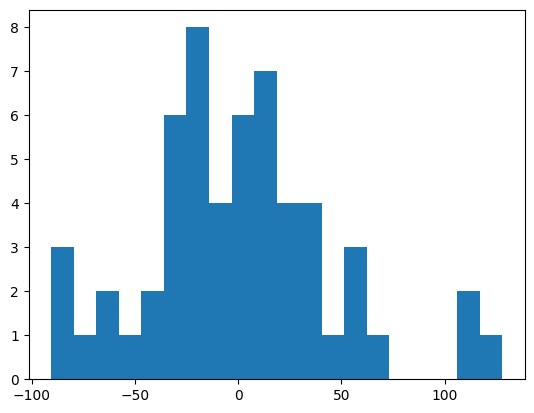

In [30]:
import matplotlib.pyplot as plt

pc_values = pca_df.to_numpy().flatten()

plt.hist(pc_values, bins=20)

In [6]:
-6.7%8

1.2999999999999998

In [78]:
import numpy as np

def map_to_music(pca_values, base_frequency=440):
    print(f'pca_values:\n{pca_values}')
    frequency = base_frequency
    notes = []
    for pc in pca_values:
        value = abs(np.log(abs(pc/pca_values[0])))
        N = 0
        print('===================================================================')
        print(f'BEFORE WHILE pc: {pc}, Value: {value}')
        while value!=0 and value * (8 ** N) < 1:
            N += 1
            print(f'IN WHILE pc: {pc}, Value: {value}, N: {N}')
        V = value * (8 ** N)
        print(f'AFTER WHILE V: {V}, N: {N}')
        print('===================================================================')
        fifth_shift = (V % 8 >= 5)  # Case A for fifth shifts
        third_shift = (3 <= V % 8 < 5)  # Case B for third shifts
            
        if fifth_shift:
            if pc >= 0:
                frequency *= 1.5
            else:
                frequency /= 0.5
        elif third_shift:
            if pc >= 0:
                frequency *= 1.25
            else:
                frequency /= 1.25

        notes.append(frequency)
    return notes

In [49]:
import librosa

def calculate_duration(time_points):
    durations = np.log(np.diff(time_points))  # Calculate log of time differences
    durations = np.append(durations, durations[-1])  # To handle the last time point
    return durations

# Adjust the sonification function to use dynamic durations
def sonify_with_dynamic_durations(pca_df, time_points, sr=22050):
    durations = calculate_duration(time_points)  # Calculate dynamic durations
    audio = []
    for i, duration in enumerate(durations):
        pc_col = 'PC' + str(i+1)
        notes = map_to_music(pca_df[pc_col])

        #####
        for note in notes:
            tone = librosa.tone(note, sr=sr, length=int(sr * duration))
            audio.append(tone)
    final_audio = audio 

        #####

        # component_audio = []
        # for note in notes:
        #     tone = librosa.tone(note, sr=sr, length=int(sr * duration))  # Use dynamic duration
        #     component_audio.append(tone)
        # component_audio = np.concatenate(component_audio)
        # audio.append(component_audio)
    
    final_audio = np.sum(audio, axis=0)  # Combine the audio from multiple components into chords
    return final_audio


In [79]:
map_to_music(pca_df['PC1'])

pca_values:
0    127.754295
1    107.903273
2     45.552743
3    -17.325763
4    -45.414914
5    -85.745900
6    -90.514192
7    -42.209542
Name: PC1, dtype: float64
BEFORE WHILE pc: 127.75429543101, Value: 0.0
AFTER WHILE V: 0.0, N: 0
BEFORE WHILE pc: 107.90327252287494, Value: 0.16887365122014483
IN WHILE pc: 107.90327252287494, Value: 0.16887365122014483, N: 1
AFTER WHILE V: 1.3509892097611587, N: 1
BEFORE WHILE pc: 45.55274298201939, Value: 1.0312380112075636
AFTER WHILE V: 1.0312380112075636, N: 0
BEFORE WHILE pc: -17.325763399181792, Value: 1.9979142446946163
AFTER WHILE V: 1.9979142446946163, N: 0
BEFORE WHILE pc: -45.41491425554418, Value: 1.034268293312866
AFTER WHILE V: 1.034268293312866, N: 0
BEFORE WHILE pc: -85.74589976199411, Value: 0.39872058352849316
IN WHILE pc: -85.74589976199411, Value: 0.39872058352849316, N: 1
AFTER WHILE V: 3.1897646682279452, N: 1
BEFORE WHILE pc: -90.51419162586106, Value: 0.34460220028730687
IN WHILE pc: -90.51419162586106, Value: 0.34460220028

[440, 440, 440, 440, 440, 352.0, 352.0, 352.0]

In [85]:
sr=22050
duration = calculate_duration(time_points)
notes = map_to_music(pca_df['PC1'])
audio = []
for i in range(len(notes)):
    tone = librosa.tone(notes[i], sr=sr, length=int(sr * duration[i]))
    print(tone)
    audio.append(tone)

pca_values:
0    127.754295
1    107.903273
2     45.552743
3    -17.325763
4    -45.414914
5    -85.745900
6    -90.514192
7    -42.209542
Name: PC1, dtype: float64
BEFORE WHILE pc: 127.75429543101, Value: 0.0
AFTER WHILE V: 0.0, N: 0
BEFORE WHILE pc: 107.90327252287494, Value: 0.16887365122014483
IN WHILE pc: 107.90327252287494, Value: 0.16887365122014483, N: 1
AFTER WHILE V: 1.3509892097611587, N: 1
BEFORE WHILE pc: 45.55274298201939, Value: 1.0312380112075636
AFTER WHILE V: 1.0312380112075636, N: 0
BEFORE WHILE pc: -17.325763399181792, Value: 1.9979142446946163
AFTER WHILE V: 1.9979142446946163, N: 0
BEFORE WHILE pc: -45.41491425554418, Value: 1.034268293312866
AFTER WHILE V: 1.034268293312866, N: 0
BEFORE WHILE pc: -85.74589976199411, Value: 0.39872058352849316
IN WHILE pc: -85.74589976199411, Value: 0.39872058352849316, N: 1
AFTER WHILE V: 3.1897646682279452, N: 1
BEFORE WHILE pc: -90.51419162586106, Value: 0.34460220028730687
IN WHILE pc: -90.51419162586106, Value: 0.34460220028

In [84]:
audio

[array([ 6.12323400e-17,  1.25050524e-01,  2.48137848e-01, ...,
        -5.51491374e-01, -4.42847654e-01, -3.27251557e-01]),
 array([ 6.12323400e-17,  1.25050524e-01,  2.48137848e-01, ...,
        -5.51491374e-01, -4.42847654e-01, -3.27251557e-01]),
 array([ 6.12323400e-17,  1.25050524e-01,  2.48137848e-01, ...,
        -6.18464377e-01, -5.15343356e-01, -4.04131832e-01]),
 array([ 6.12323400e-17,  1.25050524e-01,  2.48137848e-01, ...,
        -6.18464377e-01, -5.15343356e-01, -4.04131832e-01]),
 array([6.12323400e-17, 1.25050524e-01, 2.48137848e-01, ...,
        9.59875242e-01, 9.17272989e-01, 8.60270238e-01]),
 array([ 6.12323400e-17,  1.00134902e-01,  1.99263222e-01, ...,
        -7.10072523e-01, -7.77011449e-01, -8.36139654e-01]),
 array([ 6.12323400e-17,  1.00134902e-01,  1.99263222e-01, ...,
        -7.10072523e-01, -7.77011449e-01, -8.36139654e-01]),
 array([ 6.12323400e-17,  1.00134902e-01,  1.99263222e-01, ...,
        -7.10072523e-01, -7.77011449e-01, -8.36139654e-01])]

In [83]:
import IPython.display as ipd
ipd.Audio(audio, rate=sr)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

In [82]:
import numpy as np
import librosa
import IPython.display as ipd

# Define the sample rate and duration for each note
sr = 22050  # Sample rate
duration = 0.5  # Duration of each note in seconds

# Frequencies of the notes C, D, E, F, G, A, B in the 4th octave (piano)
note_frequencies = {
    'C': 261.63,  # C4
    'D': 293.66,  # D4
    'E': 329.63,  # E4
    'F': 349.23,  # F4
    'G': 392.00,  # G4
    'A': 440.00,  # A4
    'B': 493.88   # B4
}

# Generate tones for each note
notes_audio = []
for note in ['C', 'D', 'E', 'F', 'G', 'A', 'B']:
    tone = librosa.tone(note_frequencies[note], sr=sr, length=int(sr * duration))
    notes_audio.append(tone)

# Concatenate the notes to create a single audio array
audio_sequence = np.concatenate(notes_audio)

# Play the concatenated audio sequence
ipd.Audio(audio_sequence, rate=sr)


In [54]:
pca_df.loc[0]

PC1    127.754295
PC2     61.880930
PC3    -60.499107
PC4    -24.640371
PC5    -17.918168
PC6      4.339133
PC7     -0.530378
Name: 0, dtype: float64

In [39]:
pca_df['PC1']

0    127.754295
1    107.903273
2     45.552743
3    -17.325763
4    -45.414914
5    -85.745900
6    -90.514192
7    -42.209542
Name: PC1, dtype: float64

In [52]:
time_points = np.array([0, 2, 4, 8, 12, 24, 48, 72])  # Example time points
audio = sonify_with_dynamic_durations(pca_df, time_points)
# save_audio(audio, 'dynamic_gene_expression_music.wav')

pca_values:0    127.754295
1    107.903273
2     45.552743
3    -17.325763
4    -45.414914
5    -85.745900
6    -90.514192
7    -42.209542
Name: PC1, dtype: float64
Value:0.16887365122014483, N:0
Value:0.39872058352849316, N:0
Value:0.34460220028730687, N:0
pca_values:0     61.880930
1      5.045644
2    -76.817757
3    -87.437366
4    -62.969649
5     -2.711413
6     55.426308
7    107.583303
Name: PC2, dtype: float64
Value:0.21622376833219917, N:0
Value:0.34571066186078103, N:0
Value:0.017440791203077954, N:0
Value:0.017440791203077954, N:1
Value:0.11015769651531632, N:0
Value:0.11015769651531632, N:1
Value:0.5530534028675967, N:0
pca_values:0   -60.499107
1    17.886279
2    52.695981
3     8.595186
4   -24.723981
5   -52.968480
6    -7.738304
7    66.752427
Name: PC3, dtype: float64
Value:0.1380894129922938, N:0
Value:0.8948549366665857, N:0
Value:0.13293158791626092, N:0
Value:0.09836204494364113, N:0
Value:0.09836204494364113, N:1
pca_values:0   -24.640371
1    40.035308
2    11.

KeyError: 'PC8'